In [1]:
import os

path = 'C:\\Users\\steve\\Downloads\\PPMI_T1_TEST\\4135\\MPRAGE_GRAPPA\\2013-03-01_14_34_50.0\\S193229'
os.chdir(path) # move to the right dir

dcm_files = os.listdir()

In [2]:
def filename_sort(filename):
    
    # split by underlines and delimiter
    split_line = filename.split("_")
    int_return = int(split_line[-3])
    
    return int_return

In [3]:
dcm_files = sorted(dcm_files, key=lambda filename: filename_sort(filename))

In [4]:
import pydicom
import numpy as np

slices = []
# loop through slices and build the array
for dcm_file in dcm_files:
    slices.append(pydicom.read_file(dcm_file).pixel_array)
slices = np.array(slices)[15:175, :, :]

print (np.shape(slices))

(160, 256, 240)


In [10]:
flipped_slices = np.array([np.flip(sl,1) for sl in slices])
np.shape(flipped_slices)

(160, 256, 240)

In [13]:
np.shape(np.expand_dims(slices, axis=4))

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


(160, 256, 240, 1)

In [5]:
from deepbrain import Extractor
import nibabel as nb

total_slices_processed = []
slice_info = []

# transform into axial view
slice_axial = slices.transpose((1,2,0))

# initialise skull stripper
ext = Extractor()

# get probability of part of image being brain tissue or not
prob = ext.run(slice_axial)
mask = prob > 1e-3 # mask can be obtained as:
slice_axial[~mask] = 0 # apply mask

slice_axial = slice_axial[30:230, 30:230, :] # trim blank ones
total_slices_processed.append(slice_axial) # add original

C:\Users\steve\Anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


Instructions for updating:
Use tf.gfile.GFile.


In [6]:
total_slices_processed = np.array(total_slices_processed) # turn into array
# total_slices_processed = np.expand_dims(total_slices_processed, axis=4) # expand dimensions

In [7]:
import pickle

os.chdir('C:\\Users\\steve\\Downloads\\PPMI_T1_TEST\\4135\\')

In [8]:
# Save the model
with open('test_save', "wb") as f:
    pickle.dump(total_slices_processed, f)

In [9]:
# load our model
total_slices_processed = pickle.load( open( "test_save", "rb" ) )

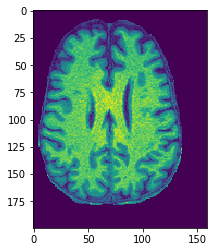

In [29]:
import cv2
# https://stackoverflow.com/questions/1735025/how-to-normalize-a-numpy-array-to-within-a-certain-range

a = total_slices_processed[0][50]

b = (a - np.min(a))/np.ptp(a)
c = 255*(a - np.min(a))/np.ptp(a).astype(int)
d = 2.*(a - np.min(a))/np.ptp(a)-1
e = (a - np.mean(a)) / np.std(a)


plt.imshow(e)
plt.show()

In [35]:
import sys

# find out which takes up the most space
sys.getsizeof(a) # a is by far the smallest. Stick with this format, no need to grayscale

112

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets # interactive plots
import matplotlib.pyplot as plt
%matplotlib inline

# total_slices_processed = np.squeeze(total_slices_processed, axis=4)
def g(i): # basic slideshow plot to get an idea of the effectiveness of the mask itself
    plt.figure(figsize=(15,8)) # make plot larger
    plt.imshow(total_slices_processed[0][i], cmap='gray')
    plt.show()
    return None
  
interact(g, i=widgets.IntSlider(min=0,max=(len(total_slices_processed[0])-1),step=1,value=65)); # plots our axial view, this is it

interactive(children=(IntSlider(value=65, description='i', max=199), Output()), _dom_classes=('widget-interact…

In [ ]:
# make black and white
# save file
print (np.shape(total_slices_processed))